2.1

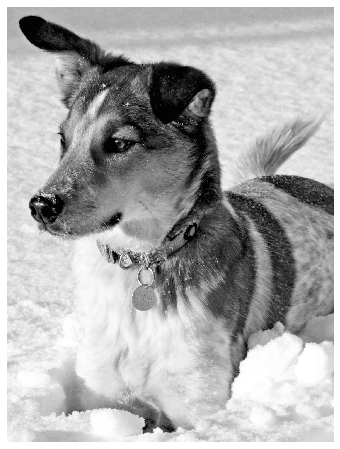

In [39]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.cm import get_cmap
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('..','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

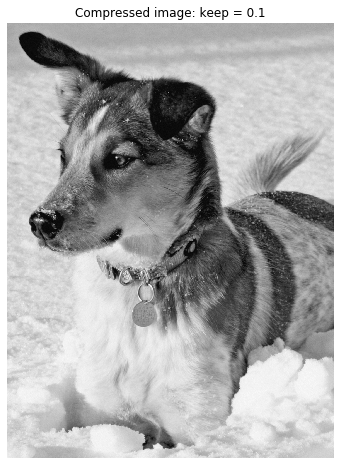

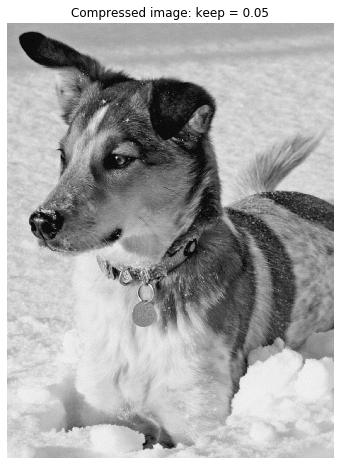

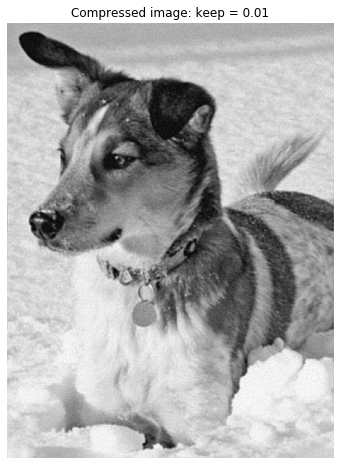

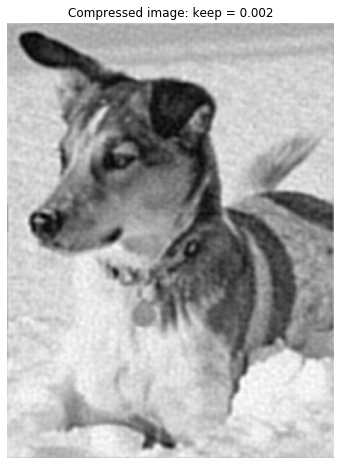

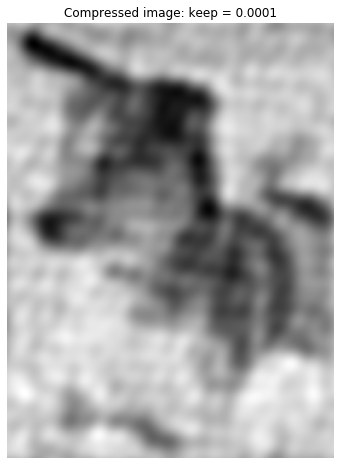

In [27]:
Bt = np.fft.fft2(X)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude
reconst_error = []
for keep in (0.1, 0.05, 0.01, 0.002,0.0001):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))


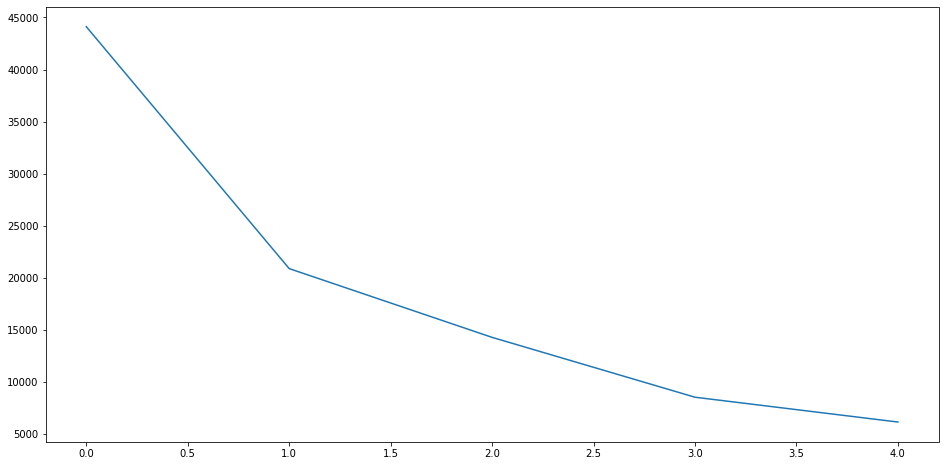

In [24]:
reconst_error = []
for keep in (0.0001,0.002,0.01,0.05,0.1):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    reconst_error.append(np.linalg.norm(Alow-X,'fro'))


plt.plot(reconst_error)

2.2

a_n = 8*sin^2(\pi*k/4)/(\pi^2*k^2)

b_n = 0

In [77]:
an = []
bn = 0
for k in range(1,101):
    an.append(8*np.sin(np.pi*k/4)**2/np.pi**2/k**2)

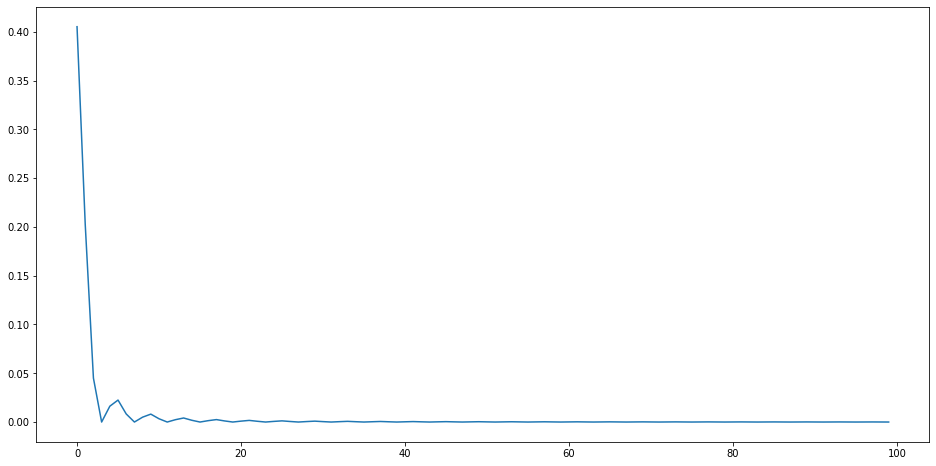

In [78]:
plt.plot(an)

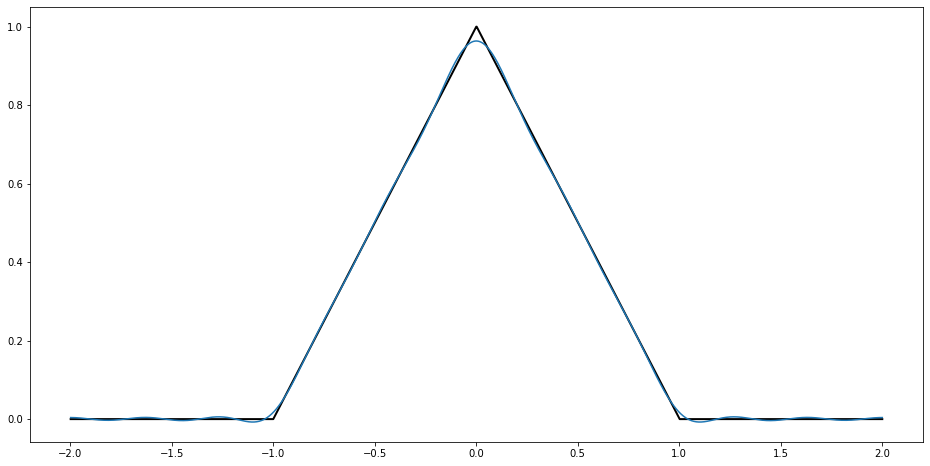

In [76]:
# Define domain
dx = 0.001
L = 2
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

fig, ax = plt.subplots()
ax.plot(x,f,'-',color='k',linewidth=2)

# Compute Fourier series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

A = np.zeros(10)
B = np.zeros(10)
for k in range(10):
    A[k] = 8*np.sin(np.pi*(k+1)/4)**2/np.pi**2/(k+1)**2 
    B[k] = 0
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)

ax.plot(x,fFS,'-')
